### ハンズオン３－１　階層化クラスタリング

In [5]:
#データを読み込む
import numpy as np
import pandas as pd

group1 = pd.DataFrame({'国語':[70,60,96,78],
                     '英語':[85,50,73,34],
                     '数学':[34,85,45,82],
                     '物理':[20,70,33,24]},
                   index=['田中一郎','鈴木太郎','佐藤春子','山本夏子'])


In [6]:
group1

,国語,数学,物理,英語
田中一郎,70,34,20,85
鈴木太郎,60,85,70,50
佐藤春子,96,45,33,73
山本夏子,78,82,24,34


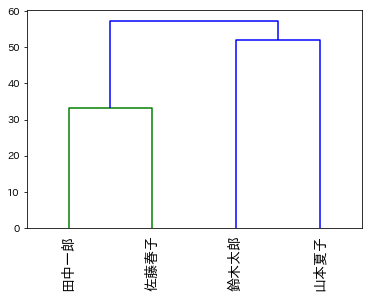

In [8]:
from scipy.cluster.hierarchy import dendrogram, linkage
import pylab as plt


#クラスタリング
result1 = linkage(group1, method = 'single')
name = ('田中一郎','鈴木太郎','佐藤春子','山本夏子')

dendrogram(
    result1,
    leaf_rotation=90.,  # rotates the x axis labels
    leaf_font_size=14.,  # font size for the x axis labels
    labels=name)
plt.show()



In [ ]:
group2 = pd.DataFrame({'英語':[80,90,80,70,30,90,60,50,30,70],
                     '数学':[40,80,30,80,40,20,40,70,50,75]},
                   index=['田中さん','鈴木さん','佐藤さん','山田さん','高橋さん','山本さん','吉田さん','伊藤さん','渡辺さん','小林さん'])

name =('Tanaka', 'Suzuki','Sato', 'Yamada', 'Takahashi', 'Yamamoto',
             'Yoshida', 'Ito', 'Watanabe','Kobayashi')


In [ ]:

from scipy.cluster.hierarchy import dendrogram, linkage
import pylab as plt

#単連結法
result1 = linkage(group2, method = 'single')

#完全連結法
result2 = linkage(group2, method = 'complete')

#群平均法
result3 = linkage(group2, method = 'average')

#重心法
result4 = linkage(group2, method = 'weighted')

#ウォード法
result5 = linkage(group2, method = 'ward')

#メディアン法
result6 = linkage(group2, method = 'centroid')


In [ ]:
#単連結法、完全連結法、群平均法のグループ分類過程
#0、１列：併合する要素、２列：距離
pd.concat([pd.DataFrame(result1),pd.DataFrame(result2),pd.DataFrame(result3)],axis=1)


In [ ]:
#重心法、ウォード法、メディアン法のグループ分類過程
#0、１列：併合する要素、２列：距離
pd.concat([pd.DataFrame(result4),pd.DataFrame(result5),pd.DataFrame(result6)],axis=1)


In [ ]:
import pylab as plt
plt.figure(figsize=(14,14))

plt.subplot(231)
dendrogram(
    result1,
    leaf_rotation=90.,  # rotates the x axis labels
    leaf_font_size=10.,  # font size for the x axis labels
    labels=name
)
plt.plot()

plt.subplot(232)
dendrogram(
    result2,
    leaf_rotation=90.,  # rotates the x axis labels
    leaf_font_size=10.,  # font size for the x axis labels
    labels=name
)
plt.plot()

plt.subplot(233)
dendrogram(
    result3,
    leaf_rotation=90.,  # rotates the x axis labels
    leaf_font_size=10.,  # font size for the x axis labels
    labels=name
)
plt.plot()

plt.subplot(234)
dendrogram(
    result4,
    leaf_rotation=90.,  # rotates the x axis labels
    leaf_font_size=10.,  # font size for the x axis labels
    labels=name
)
plt.plot()

plt.subplot(235)
dendrogram(
    result5,
    leaf_rotation=90.,  # rotates the x axis labels
    leaf_font_size=10.,  # font size for the x axis labels
    labels=name
)
plt.plot()

plt.subplot(236)
dendrogram(
    result6,
    leaf_rotation=90.,  # rotates the x axis labels
    leaf_font_size=10.,  # font size for the x axis labels
    labels=name
)
plt.plot()

plt.show()




In [ ]:
import pandas as pd
#身長と体重のデータを読み込む
childrenk = pd.read_csv("https://raw.githubusercontent.com/futurebridge/ZukaiML/master/childrenk.csv",encoding="SHIFT-JIS")

childrenk = childrenk.dropna()

In [ ]:
from sklearn.cluster import KMeans

import numpy as np

import matplotlib.pyplot as plt

kmeans = KMeans(n_clusters=6, init='random', random_state=0)

y_kmeans = kmeans.fit_predict(childrenk)


# グラフの作成

plt.scatter(childrenk.age, childrenk.length, c=y_kmeans, s=20, cmap='viridis')

centers = kmeans.cluster_centers_

plt.scatter(centers[:, 0], centers[:, 1], c='black', s=100, alpha=0.3)

In [ ]:
plt.show()

In [ ]:
y_kmeans

In [ ]:
distortions = []

for i  in range(1,11):                
    km = KMeans(n_clusters=i,
                init='k-means++',     
                n_init=10,
                max_iter=300,
                random_state=0)
    km.fit(childrenk)                         
    inertia_= np.round(km.inertia_,3) 
    distortions.append(inertia_)  
    print (inertia_)
    
plt.plot(range(1,11),distortions,marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.show()


In [ ]:
from sklearn.cluster import KMeans

import numpy as np

import matplotlib.pyplot as plt

kmeans = KMeans(n_clusters=3, init='random', random_state=0)

y_kmeans = kmeans.fit_predict(childrenk)


# グラフの作成

plt.scatter(childrenk.age, childrenk.length, c=y_kmeans, s=20, cmap='viridis')

centers = kmeans.cluster_centers_

plt.scatter(centers[:, 0], centers[:, 1], c='black', s=100, alpha=0.3)

plt.show()



In [ ]:
from sklearn.metrics import silhouette_samples
from matplotlib import cm

cluster_labels = np.unique(y_kmeans)       # y_kmの要素の中で重複を無くす
n_clusters=cluster_labels.shape[0]     # 配列の長さを返す。つまりここでは n_clustersで指定した3となる

# シルエット係数を計算  
silhouette_vals = silhouette_samples(childrenk,y_kmeans,metric='euclidean')  # サンプルデータ, クラスター番号、ユークリッド距離でシルエット係数計算
y_ax_lower, y_ax_upper= 0,0
yticks = []

for i,c in enumerate(cluster_labels):
        c_silhouette_vals = silhouette_vals[y_kmeans==c]      # cluster_labelsには 0-5の値
        c_silhouette_vals.sort()
        y_ax_upper += len(c_silhouette_vals)              # サンプルの個数をグループごとに足してy軸の最大値を決定
        color = cm.jet(float(i)/n_clusters)               # 色の値を作る
        plt.barh(range(y_ax_lower,y_ax_upper),            # 棒グラフのを描画（底辺の範囲を指定）
                         c_silhouette_vals,               # 棒の幅（1サンプルを表す）
                         height=1.0,                      # 棒の高さ
                         edgecolor='none',                # 棒の端の色
                         color=color)                     # 棒の色
        yticks.append((y_ax_lower+y_ax_upper)/2)          # ラベルの表示位置を追加
        y_ax_lower += len(c_silhouette_vals)              # 底辺の値に棒の幅を追加
        print ("グループ",i+1,",　シルエット係数平均",np.mean(c_silhouette_vals),"個数",len(c_silhouette_vals))

        
silhouette_avg = np.mean(silhouette_vals)                 # シルエット係数の平均値
plt.axvline(silhouette_avg,color="red",linestyle="--")    # 係数の平均値に破線を引く 
plt.yticks(yticks,cluster_labels + 1)                     # クラスタレベルを表示
plt.ylabel('Cluster')
plt.xlabel('silhouette coefficient')
plt.show()

In [ ]:
silhouette_avg